<a href="https://colab.research.google.com/github/NithishaRaghavaraju/Crypto-currency-Prediction-from-Tweets/blob/main/Crypto_currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import re
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import time
import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# import the text files
df1 = pd.read_csv('/content/cleaned_tweets_elon_ethereum.csv',index_col=0)
df2 = pd.read_csv('/content/cleaned_tweets_elon_eth.csv',index_col=0)
df3 = pd.read_csv('/content/cleaned_tweets_elon_btc.csv',index_col=0)
df4 = pd.read_csv('/content/cleaned_tweets_elon_bitcoin.csv',index_col=0)
df5 = pd.read_csv('/content/cleaned_tweets_cz_binance_ethereum.csv',index_col=0)
df6 = pd.read_csv('/content/cleaned_tweets_cz_binance_Bitcoin.csv',index_col=0)
df7 = pd.read_csv('/content/cleaned_tweets_binance_btc.csv',index_col=0)
df8 = pd.read_csv('/content/cleaned_tweets_binance_bitcoin.csv',index_col=0)
df9 = pd.read_csv('/content/cleaned_tweets_binance_Ethereum.csv',index_col=0)
df10 = pd.read_csv('/content/cleaned_tweets_binance_Eth.csv',index_col=0)
df11 = pd.read_csv('/content/cleaned_tweets_SBF_FTX_ethereum.csv',index_col=0)
df12 = pd.read_csv('/content/cleaned_tweets_SBF_FTX_bitcoin.csv',index_col=0)

In [ ]:
#import the numerical files
num_data_1 = pd.read_csv('/content/ETH-USD_num.csv')
num_data_2 = pd.read_csv('/content/numerical_data.csv')

In [ ]:
# combining the all text files
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df12],ignore_index=True)

In [ ]:
df

,Date,User,tweet_text
0,2022-03-14 04:11:38+00:00,elonmusk,"As a general principle, for those looking fo..."
1,2021-12-23 07:11:42+00:00,elonmusk,That’s why I’m pro Doge
2,2021-10-24 18:01:32+00:00,elonmusk,"Out of curiosity, I acquired some ascii ha..."
3,2021-06-05 08:21:59+00:00,elonmusk,I pretty much agree with V...
4,2020-07-02 16:42:52+00:00,elonmusk,I’m not building anything on ethereum....
...,...,...,...
2332,2020-05-11 17:44:52+00:00,SBF_FTX,"Hey guys I think bitcoin is halving today, not..."
2333,2020-04-12 06:33:30+00:00,SBF_FTX,The goal is to have a bunch of other tradi...
2334,2020-01-09 19:06:52+00:00,SBF_FTX,3) BitMEXGood: liquidity in Bitcoin perpsSugge...
2335,2019-09-25 03:31:47+00:00,SBF_FTX,"tokens move a lot--some are down a lot, some..."


In [ ]:
#concatination date of formate "2022-03-14 04:11:38+00:00" to "2022-03-14	"
df['Date'] = df['Date'].apply(lambda x: x[0:10])

In [ ]:
df

,Date,User,tweet_text
0,2022-03-14,elonmusk,"As a general principle, for those looking fo..."
1,2021-12-23,elonmusk,That’s why I’m pro Doge
2,2021-10-24,elonmusk,"Out of curiosity, I acquired some ascii ha..."
3,2021-06-05,elonmusk,I pretty much agree with V...
4,2020-07-02,elonmusk,I’m not building anything on ethereum....
...,...,...,...
2332,2020-05-11,SBF_FTX,"Hey guys I think bitcoin is halving today, not..."
2333,2020-04-12,SBF_FTX,The goal is to have a bunch of other tradi...
2334,2020-01-09,SBF_FTX,3) BitMEXGood: liquidity in Bitcoin perpsSugge...
2335,2019-09-25,SBF_FTX,"tokens move a lot--some are down a lot, some..."


In [ ]:
#converting date in str datatype to datatime datatype
df['Date'] = pd.to_datetime(df.Date, infer_datetime_format = True)
df.sort_values(by = 'Date', ascending = True, inplace = True) #ascending order wrt date
display(df.head())

,Date,User,tweet_text
1900,2019-01-03,binance,Binance Will Support the Upcoming Ethereum Con...
872,2019-01-14,binance,"1. $BTC, $LTC, $BCH now on 2. meetup andam..."
364,2019-01-23,cz_binance,"Chance encounters, bumps into on airplane fi..."
871,2019-02-09,binance,"“I just received 0.00000546 BTC, where did it ..."
870,2019-02-16,binance,Monthly review - Month 19- $BNB Soars to top...


In [ ]:
# combining numerical data
num_data =pd.concat([num_data_1,num_data_2],ignore_index=True)

In [ ]:
num_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2019,133.418152,141.397507,132.650711,140.819412,140.819412,2.258710e+09
1,02-01-2019,141.519516,156.929138,140.650955,155.047684,155.047684,3.328240e+09
2,03-01-2019,155.196045,155.863052,147.198364,149.135010,149.135010,2.676165e+09
3,04-01-2019,148.912888,156.878983,147.907104,154.581940,154.581940,3.126193e+09
4,05-01-2019,154.337418,160.824890,154.337418,155.638596,155.638596,3.338212e+09
...,...,...,...,...,...,...,...
2797,28-10-2022,20287.957030,20724.980470,20086.068360,20595.351560,20595.351560,4.399472e+10
2798,29-10-2022,20595.103520,20988.394530,20566.484380,20818.476560,20818.476560,4.036984e+10
2799,30-10-2022,20817.982420,20917.005860,20547.462890,20635.603520,20635.603520,3.148635e+10
2800,31-10-2022,20633.695310,20795.320310,20287.458980,20495.773440,20495.773440,4.566847e+10


In [ ]:
num_data['Date'] = pd.to_datetime(num_data.Date, infer_datetime_format = True)#converting date in str datatype to datatime datatype
num_data.sort_values(by = 'Date', ascending = True, inplace = True)#ascending order wrt date

In [ ]:
num_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,133.418152,141.397507,132.650711,140.819412,140.819412,2.258710e+09
1401,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09
31,2019-01-02,107.147682,108.638710,105.046501,107.609787,107.609787,2.541272e+09
1432,2019-01-02,3460.547119,3501.954102,3431.591553,3487.945313,3487.945313,5.422927e+09
59,2019-01-03,136.836243,138.995270,136.434784,136.443619,136.443619,3.756125e+09
...,...,...,...,...,...,...,...
2720,2022-12-08,23957.203130,24412.566410,23657.265630,24402.818360,24402.818360,2.726580e+10
1350,2022-12-09,1762.084839,1778.163452,1698.293457,1713.765259,1713.765259,1.768839e+10
2751,2022-12-09,21770.148440,22439.181640,21603.896480,22370.449220,22370.449220,5.021209e+10
1380,2022-12-10,1279.732300,1303.075195,1277.527466,1294.906372,1294.906372,8.355639e+09


In [ ]:
#reseting the index
num_data = num_data.reset_index(drop=True)

In [ ]:
final = pd.merge(df, num_data, 
                   on='Date', 
                   how='left')

In [ ]:
final

,Date,User,tweet_text,Open,High,Low,Close,Adj Close,Volume
0,2019-01-03,binance,Binance Will Support the Upcoming Ethereum Con...,136.836243,138.995270,136.434784,136.443619,136.443619,3.756125e+09
1,2019-01-03,binance,Binance Will Support the Upcoming Ethereum Con...,3853.757080,3907.795410,3851.692383,3859.583740,3859.583740,7.661248e+09
2,2019-01-14,binance,"1. $BTC, $LTC, $BCH now on 2. meetup andam...",3557.311035,3727.836182,3552.285156,3706.052246,3706.052246,5.651384e+09
3,2019-01-14,binance,"1. $BTC, $LTC, $BCH now on 2. meetup andam...",116.979095,130.856735,116.967560,129.068726,129.068726,2.798086e+09
4,2019-01-23,cz_binance,"Chance encounters, bumps into on airplane fi...",3605.557129,3623.067871,3565.313965,3585.123047,3585.123047,5.433756e+09
...,...,...,...,...,...,...,...,...,...
4641,2022-10-26,binance,6.9 CZs or 6.9 ETH?,1461.133179,1584.636719,1460.428711,1566.566650,1566.566650,3.270555e+10
4642,2022-10-30,cz_binance,"No, not bitcoin.",1619.697876,1637.037842,1579.485229,1590.783325,1590.783325,1.393007e+10
4643,2022-10-30,cz_binance,"No, not bitcoin.",20817.982420,20917.005860,20547.462890,20635.603520,20635.603520,3.148635e+10
4644,2022-10-30,binance,Reminder trading fees on are 0%.,1619.697876,1637.037842,1579.485229,1590.783325,1590.783325,1.393007e+10


In [ ]:
#droping out null values
final = final.dropna()
final = final.reset_index(drop=True)
org_data = final

In [ ]:
def cleanRT(text):
    text = re.sub(r'RT[\s]+', '', text) # Remove RT    
    return text

def cleanURLExcessMentions(text):
    text = re.sub(r'https?://[A-Za-z0-9.]+', '', text) # Remove hyperlink
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) # Remove the '#' symbol
    text = re.sub(r'$[A-Za-z0-9_]+', '', text) # Remove the '$' symbol
    return text

def cleanOtherSymbol(text):
    text = re.sub(r'[$&()!?:.]', '', text) # Remove the symbols
    text = re.sub(r'\n', '', text) # Remove additional symbols 
    return text

In [ ]:
# Cleaning the text
final["tweet_text"] = final['tweet_text'].apply(cleanRT)
final["tweet_text"] = final['tweet_text'].apply(cleanURLExcessMentions)
final["tweet_text"] = final['tweet_text'].apply(cleanOtherSymbol)
final.head()

,Date,User,tweet_text,Open,High,Low,Close,Adj Close,Volume
0,2019-01-03,binance,Binance Will Support the Upcoming Ethereum Con...,136.836243,138.995270,136.434784,136.443619,136.443619,3.756125e+09
1,2019-01-03,binance,Binance Will Support the Upcoming Ethereum Con...,3853.757080,3907.795410,3851.692383,3859.583740,3859.583740,7.661248e+09
2,2019-01-14,binance,"1 BTC, LTC, BCH now on 2 meetup andamp; pr...",3557.311035,3727.836182,3552.285156,3706.052246,3706.052246,5.651384e+09
3,2019-01-14,binance,"1 BTC, LTC, BCH now on 2 meetup andamp; pr...",116.979095,130.856735,116.967560,129.068726,129.068726,2.798086e+09
4,2019-01-23,cz_binance,"Chance encounters, bumps into on airplane fi...",3605.557129,3623.067871,3565.313965,3585.123047,3585.123047,5.433756e+09


In [ ]:
# Create a function to compute the negative, neutral, and positive analysis using vader
final['scores'] = final['tweet_text'].apply(lambda text: sid.polarity_scores(text))
final.head()

,Date,User,tweet_text,Open,High,Low,Close,Adj Close,Volume,scores
0,2019-01-03,binance,Binance Will Support the Upcoming Ethereum Con...,136.836243,138.995270,136.434784,136.443619,136.443619,3.756125e+09,"{'neg': 0.126, 'neu': 0.631, 'pos': 0.243, 'co..."
1,2019-01-03,binance,Binance Will Support the Upcoming Ethereum Con...,3853.757080,3907.795410,3851.692383,3859.583740,3859.583740,7.661248e+09,"{'neg': 0.126, 'neu': 0.631, 'pos': 0.243, 'co..."
2,2019-01-14,binance,"1 BTC, LTC, BCH now on 2 meetup andamp; pr...",3557.311035,3727.836182,3552.285156,3706.052246,3706.052246,5.651384e+09,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp..."
3,2019-01-14,binance,"1 BTC, LTC, BCH now on 2 meetup andamp; pr...",116.979095,130.856735,116.967560,129.068726,129.068726,2.798086e+09,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp..."
4,2019-01-23,cz_binance,"Chance encounters, bumps into on airplane fi...",3605.557129,3623.067871,3565.313965,3585.123047,3585.123047,5.433756e+09,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou..."


In [ ]:
# Create compounded score of the initial neg, neu, and pos data
final['compound'] = final['scores'].apply(lambda score_dict: score_dict['compound'])
final['sentiment_type'] = ''
final.loc[final.compound > 0, 'sentiment_type'] = 'POSITIVE'
final.loc[final.compound == 0, 'sentiment_type'] = 'NEUTRAL'
final.loc[final.compound < 0, 'sentiment_type'] = 'NEGATIVE'
final.head()

,Date,User,tweet_text,Open,High,Low,Close,Adj Close,Volume,scores,compound,sentiment_type
0,2019-01-03,binance,Binance Will Support the Upcoming Ethereum Con...,136.836243,138.995270,136.434784,136.443619,136.443619,3.756125e+09,"{'neg': 0.126, 'neu': 0.631, 'pos': 0.243, 'co...",0.3182,POSITIVE
1,2019-01-03,binance,Binance Will Support the Upcoming Ethereum Con...,3853.757080,3907.795410,3851.692383,3859.583740,3859.583740,7.661248e+09,"{'neg': 0.126, 'neu': 0.631, 'pos': 0.243, 'co...",0.3182,POSITIVE
2,2019-01-14,binance,"1 BTC, LTC, BCH now on 2 meetup andamp; pr...",3557.311035,3727.836182,3552.285156,3706.052246,3706.052246,5.651384e+09,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp...",0.3818,POSITIVE
3,2019-01-14,binance,"1 BTC, LTC, BCH now on 2 meetup andamp; pr...",116.979095,130.856735,116.967560,129.068726,129.068726,2.798086e+09,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp...",0.3818,POSITIVE
4,2019-01-23,cz_binance,"Chance encounters, bumps into on airplane fi...",3605.557129,3623.067871,3565.313965,3585.123047,3585.123047,5.433756e+09,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...",0.8658,POSITIVE


In [ ]:
#droping unneccesary columns
final = final.drop(['User',"Date","scores","tweet_text","sentiment_type"], axis=1)

In [ ]:
#moving close column at last
final.insert(len(final.columns)-1, 'Close', final.pop('Close'))

In [ ]:
final

,Open,High,Low,Adj Close,Volume,compound,Close
0,136.836243,138.995270,136.434784,136.443619,3.756125e+09,0.3182,136.443619
1,3853.757080,3907.795410,3851.692383,3859.583740,7.661248e+09,0.3182,3859.583740
2,3557.311035,3727.836182,3552.285156,3706.052246,5.651384e+09,0.3818,3706.052246
3,116.979095,130.856735,116.967560,129.068726,2.798086e+09,0.3818,129.068726
4,3605.557129,3623.067871,3565.313965,3585.123047,5.433756e+09,0.8658,3585.123047
...,...,...,...,...,...,...,...
4613,1461.133179,1584.636719,1460.428711,1566.566650,3.270555e+10,0.0000,1566.566650
4614,1619.697876,1637.037842,1579.485229,1590.783325,1.393007e+10,-0.2960,1590.783325
4615,20817.982420,20917.005860,20547.462890,20635.603520,3.148635e+10,-0.2960,20635.603520
4616,1619.697876,1637.037842,1579.485229,1590.783325,1.393007e+10,0.0000,1590.783325


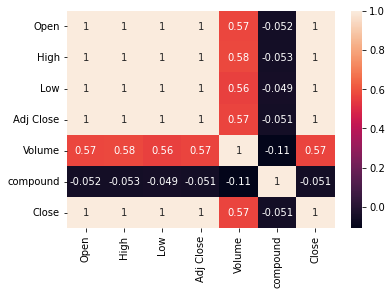

In [ ]:
#correlation matrix
import seaborn as sn
corr_matrix = final.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
#converting into an array
result = np.array(final) 
row = round(0.2 * result.shape[0]) # choosing percentage of train and test values

In [ ]:
result.shape

(4618, 7)

In [ ]:
train = result[:int(row), :]
test = result[int(row):, :]

In [ ]:
x_train = train[:, :-1]
y_train = train[:, -1]
x_test = test[:, :-1]
y_test = test[:, -1]

In [ ]:
x_train.shape

(924, 6)

In [ ]:
#Scaling the values
x_scaler=MinMaxScaler(feature_range=(0, 1))
X_train = x_scaler.fit_transform(x_train)
X_test = x_scaler.transform(x_test)

In [ ]:
y_train = y_train.reshape(-1,1)#converting 1d to2d
y_test = y_test.reshape(-1,1)#converting 1d to2d
#Scaling the values
y_scaler=MinMaxScaler(feature_range=(0, 1))
Y_train = y_scaler.fit_transform(y_train)
Y_test = y_scaler.transform(y_test)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) 

In [ ]:
print("Data Split Complete")
print("x_train shape={}".format(X_train.shape))
print("y_train shape={}".format(Y_train.shape))
print("x_test shape={}".format(X_test.shape))
print("y_test shape={}".format(Y_test.shape))
    

Data Split Complete
x_train shape=(924, 6, 1)
y_train shape=(924, 1)
x_test shape=(3694, 6, 1)
y_test shape=(3694, 1)


In [ ]:
##change the number of units  for different outputs ##
layer_units=[50,100] 
window_size = 6
dropouts=[0.2,0.2]

In [ ]:
model = Sequential()
# hidden layer 1
model.add(LSTM(layer_units[0], input_shape=(window_size,1), return_sequences=True))
model.add(Dropout(dropouts[0]))
    
# hidden layer 2
model.add(LSTM(layer_units[1]))
model.add(Dropout(dropouts[1]))
    
# output layer
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="rmsprop")
    

In [ ]:
X_train.shape

(924, 6, 1)

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,verbose=0)]# for early stopping
history = model.fit(X_train, Y_train, epochs=20, batch_size=32,verbose=1,validation_split=0.05,callbacks=callbacks)

Epoch 1/20
28/28 [==============================] - 5s 47ms/step - loss: 0.0134 - val_loss: 0.0043
Epoch 2/20
28/28 [==============================] - 0s 13ms/step - loss: 0.0022 - val_loss: 7.6833e-04
Epoch 3/20
28/28 [==============================] - 0s 13ms/step - loss: 0.0018 - val_loss: 8.7906e-05
Epoch 4/20
28/28 [==============================] - 0s 13ms/step - loss: 0.0016 - val_loss: 9.3670e-04
Epoch 5/20
28/28 [==============================] - 0s 13ms/step - loss: 0.0020 - val_loss: 3.2998e-04


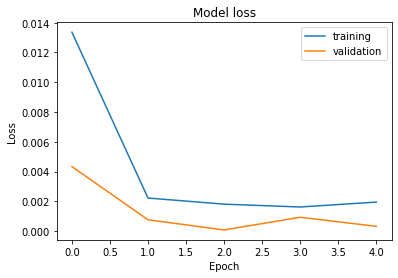

In [ ]:
#ploting the graph b/w epoch and loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
#predict x_test values
predicted_data = model.predict(X_test)

116/116 [==============================] - 1s 5ms/step


In [ ]:
#transforming to the original values
pred_data = y_scaler.inverse_transform(predicted_data)

In [ ]:
#predict x_train values
X_train_pred = y_scaler.inverse_transform(model.predict(X_train))

29/29 [==============================] - 0s 5ms/step


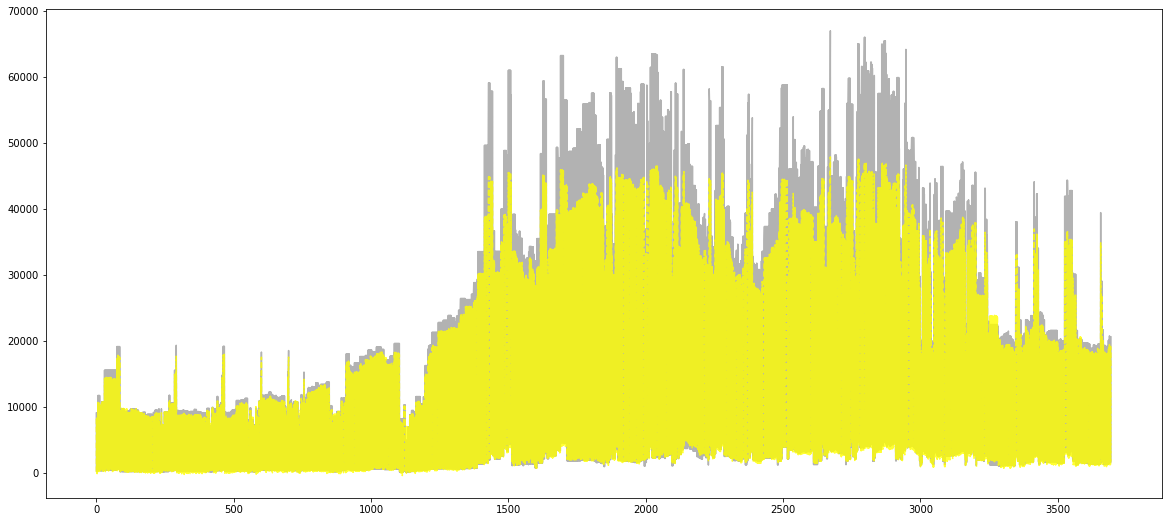

In [ ]:
def plot_reg_results(predicted_data, true_data, prediction_len=3):
    fig = plt.figure(facecolor='white', figsize=(20, 9))
    ax = fig.add_subplot(111)
    
    # plot actual data
    ax.plot(true_data, 
            label='True Data',
            c='black',alpha=0.3)
    
    # plot flattened data
    plt.plot(np.array(predicted_data).flatten(), 
             label='Prediction_full',
             c='yellow',linestyle='--',alpha=0.8)
    plt.show()



plot_reg_results(pred_data,y_test,prediction_len=3)

In [ ]:
import math
# calculate root mean squared error
trainScore_RMSE = math.sqrt(mean_squared_error(y_train, X_train_pred))
testScore_RMSE = math.sqrt(mean_squared_error(y_test, pred_data))

# calculate absolute mean error
trainScore_MAE = np.sum(np.absolute(y_train - X_train_pred))/len(y_train)
testScore_MAE = np.sum(np.absolute(y_test - pred_data))/len(y_test)

In [ ]:
print('Train Score: %.2f RMSE' % (trainScore_RMSE))
print('Test Score: %.2f RMSE' % (testScore_RMSE))

print('Train Score: %.2f MAE' % (trainScore_MAE))
print('Test Score: %.2f MAE' % (testScore_MAE))



Train Score: 437.61 RMSE
Test Score: 4833.83 RMSE
Train Score: 321.49 MAE
Test Score: 2520.62 MAE


In [ ]:
time_df = pd.DataFrame(org_data["Date"]) # extracting date values
df1 = pd.DataFrame(X_train_pred,columns=['Train'])# placing predicted train values
df2 = pd.DataFrame(pred_data,columns=['Test'])# placing predicted test values
df2.index = df2.index + len(df1)
actual = list(y_train.flatten()) +list(y_test.flatten())# exatracting actual train and test values
time_df['Actual'] = actual
time_df2 = pd.concat([time_df, df1, df2], axis=1)# combining all data

Text(0.5, 1.0, 'Bitcoin Price Prediction')

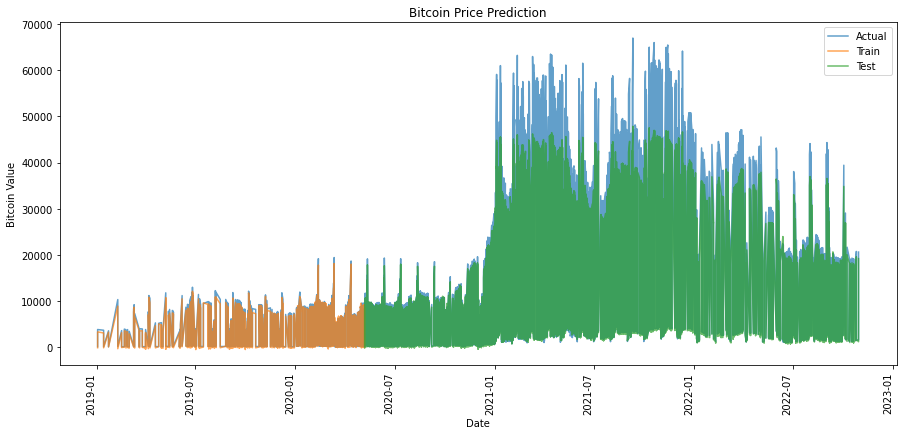

In [ ]:
time_df2.set_index('Date',inplace=True)
# plot the output
fig, ax = plt.subplots(figsize=(15,7))
time_df2.plot(ax=ax,rot=90,alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Bitcoin Value')
plt.title('Bitcoin Price Prediction')

In [ ]:
#extracting bitcoin string data
bitcoin_data = pd.concat([df6,df7,df8,df12],ignore_index=True)
bitcoin_data['Date'] = bitcoin_data['Date'].apply(lambda x: x[0:10])
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data.Date, infer_datetime_format = True)
bitcoin_data.sort_values(by = 'Date', ascending = True, inplace = True)

In [ ]:
#extracting bitcoin numerical data
num_data_1['Date'] = pd.to_datetime(num_data_1.Date, infer_datetime_format = True)
num_data_1.sort_values(by = 'Date', ascending = True, inplace = True)
num_data_1 = num_data_1.dropna()

In [ ]:
#reseting the index
bitcoin_data = bitcoin_data.reset_index(drop=True)
num_data_1 = num_data_1.reset_index(drop=True)

In [ ]:
num_data_1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
1,2019-01-02,107.147682,108.638710,105.046501,107.609787,107.609787,2541271519
2,2019-01-03,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
3,2019-01-04,141.465485,142.733994,140.737564,141.830322,141.830322,4611999536
4,2019-01-05,162.186554,164.060684,159.660217,160.818344,160.818344,5789172433
...,...,...,...,...,...,...,...
1396,2022-12-06,1530.189697,1539.705078,1436.183960,1445.216553,1445.216553,23465074882
1397,2022-12-07,1097.259155,1097.259155,1038.135620,1038.191650,1038.191650,12583282453
1398,2022-12-08,1880.899170,1957.552979,1860.083496,1957.246460,1957.246460,17168141904
1399,2022-12-09,1762.084839,1778.163452,1698.293457,1713.765259,1713.765259,17688391310


In [ ]:
#merging the
final_bitcoin = pd.merge(bitcoin_data, num_data_1, on='Date', how='left')
final_bitcoin = final_bitcoin.dropna()
final_bitcoin = final_bitcoin.reset_index(drop=True)

In [ ]:
# Cleaning the text
final_bitcoin["tweet_text"] = final_bitcoin['tweet_text'].apply(cleanRT)
final_bitcoin["tweet_text"] = final_bitcoin['tweet_text'].apply(cleanURLExcessMentions)
final_bitcoin["tweet_text"] = final_bitcoin['tweet_text'].apply(cleanOtherSymbol)
# Create a function to compute the negative, neutral, and positive analysis using vader
final_bitcoin['scores'] = final_bitcoin['tweet_text'].apply(lambda text: sid.polarity_scores(text))

In [ ]:
# Create compounded score of the initial neg, neu, and pos data
final_bitcoin['compound'] = final_bitcoin['scores'].apply(lambda score_dict: score_dict['compound'])
final_bitcoin['sentiment_type'] = ''
final_bitcoin.loc[final_bitcoin.compound > 0, 'sentiment_type'] = 'POSITIVE'
final_bitcoin.loc[final_bitcoin.compound == 0, 'sentiment_type'] = 'NEUTRAL'
final_bitcoin.loc[final_bitcoin.compound < 0, 'sentiment_type'] = 'NEGATIVE'
final_bitcoin.head()

,Date,User,tweet_text,Open,High,Low,Close,Adj Close,Volume,scores,compound,sentiment_type
0,2019-01-14,binance,"1 BTC, LTC, BCH now on 2 meetup andamp; pr...",116.979095,130.856735,116.967560,129.068726,129.068726,2.798086e+09,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp...",0.3818,POSITIVE
1,2019-01-23,cz_binance,"Chance encounters, bumps into on airplane fi...",118.713814,119.422798,116.376648,117.452606,117.452606,2.556952e+09,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...",0.8658,POSITIVE
2,2019-02-09,binance,"“I just received 000000546 BTC, where did it c...",171.697601,180.145218,170.451691,178.347351,178.347351,6.503447e+09,"{'neg': 0.112, 'neu': 0.839, 'pos': 0.049, 'co...",-0.4404,NEGATIVE
3,2019-02-16,binance,Monthly review - Month 19- BNB Soars to top ...,122.396454,124.134811,122.295303,123.260216,123.260216,2.905833e+09,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...",0.5267,POSITIVE
4,2019-02-24,binance,"""As early as March 2018, it was estimated that...",158.902405,165.549622,135.852661,135.852661,135.852661,5.957715e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


In [ ]:
#droping the unwanted columns
final_bitcoin = final_bitcoin.drop(['User',"Date","scores","tweet_text","sentiment_type","Close",], axis=1)

In [ ]:
final_bitcoin

,Open,High,Low,Adj Close,Volume,compound
0,116.979095,130.856735,116.967560,129.068726,2.798086e+09,0.3818
1,118.713814,119.422798,116.376648,117.452606,2.556952e+09,0.8658
2,171.697601,180.145218,170.451691,178.347351,6.503447e+09,-0.4404
3,122.396454,124.134811,122.295303,123.260216,2.905833e+09,0.5267
4,158.902405,165.549622,135.852661,135.852661,5.957715e+09,0.0000
...,...,...,...,...,...,...
1634,1283.188110,1305.081299,1260.666748,1299.946411,1.041257e+10,0.6845
1635,1283.188110,1305.081299,1260.666748,1299.946411,1.041257e+10,0.7845
1636,1344.711304,1509.985474,1336.978882,1461.665405,2.536729e+10,0.6486
1637,1619.697876,1637.037842,1579.485229,1590.783325,1.393007e+10,0.0000


In [ ]:

bitcoin_array = np.array(final_bitcoin)# converting df to array
#scaling the values
bitcoin_scale = x_scaler.fit_transform(bitcoin_array)
bitcoin_scale = np.reshape(bitcoin_scale, (bitcoin_scale.shape[0], bitcoin_scale.shape[1], 1))

In [ ]:
pred_bitcoin = model.predict(bitcoin_scale)

52/52 [==============================] - 1s 9ms/step


In [ ]:
cost_bitcoin = y_scaler.inverse_transform(pred_bitcoin)
final_bitcoin["Close"] = list(cost_bitcoin.flatten())

In [ ]:
#finding the moving averages
final_bitcoin['moving average'] = final_bitcoin['Close'].rolling(30).mean()
final_bitcoin = final_bitcoin.dropna()

In [ ]:
final_bitcoin

,Open,High,Low,Adj Close,Volume,compound,Close,moving average
29,165.511246,172.515778,161.799469,165.947205,7.167016e+09,0.4404,229.303574,155.198481
30,165.511246,172.515778,161.799469,165.947205,7.167016e+09,0.4404,229.303574,164.674552
31,287.893829,295.991425,286.665863,287.547119,7.674615e+09,0.4767,704.302307,184.267456
32,256.179657,265.371399,254.147430,264.087463,8.676891e+09,0.7506,728.418396,212.113418
33,269.090576,275.442566,268.353790,274.351105,6.009796e+09,0.4215,576.522339,231.131830
...,...,...,...,...,...,...,...,...
1634,1283.188110,1305.081299,1260.666748,1299.946411,1.041257e+10,0.6845,4546.897949,6396.860921
1635,1283.188110,1305.081299,1260.666748,1299.946411,1.041257e+10,0.7845,4588.137695,6387.161735
1636,1344.711304,1509.985474,1336.978882,1461.665405,2.536729e+10,0.6486,5353.788086,6398.530127
1637,1619.697876,1637.037842,1579.485229,1590.783325,1.393007e+10,0.0000,5564.136230,6206.177344


In [ ]:
final_bitcoin = final_bitcoin.reset_index(drop=True)

In [ ]:
#adding bearish and bullish in a list
classification =[]
for i in range(len(final_bitcoin)):
  if final_bitcoin['moving average'][i] > final_bitcoin['Close'][i]:
    classification.append("Bearish")
  else:
    classification.append("Bullish")

In [ ]:
final_bitcoin["classify"] = classification

In [ ]:
final_bitcoin

,Open,High,Low,Adj Close,Volume,compound,Close,moving average,classify
0,165.511246,172.515778,161.799469,165.947205,7.167016e+09,0.4404,229.303574,155.198481,Bullish
1,165.511246,172.515778,161.799469,165.947205,7.167016e+09,0.4404,229.303574,164.674552,Bullish
2,287.893829,295.991425,286.665863,287.547119,7.674615e+09,0.4767,704.302307,184.267456,Bullish
3,256.179657,265.371399,254.147430,264.087463,8.676891e+09,0.7506,728.418396,212.113418,Bullish
4,269.090576,275.442566,268.353790,274.351105,6.009796e+09,0.4215,576.522339,231.131830,Bullish
...,...,...,...,...,...,...,...,...,...
1605,1283.188110,1305.081299,1260.666748,1299.946411,1.041257e+10,0.6845,4546.897949,6396.860921,Bearish
1606,1283.188110,1305.081299,1260.666748,1299.946411,1.041257e+10,0.7845,4588.137695,6387.161735,Bearish
1607,1344.711304,1509.985474,1336.978882,1461.665405,2.536729e+10,0.6486,5353.788086,6398.530127,Bearish
1608,1619.697876,1637.037842,1579.485229,1590.783325,1.393007e+10,0.0000,5564.136230,6206.177344,Bearish
